#**Clustering the Countries by using K-Means for HELP International**

#Objective
Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

#Tentang Organisasi
HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

#Permasalahan
HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugasnyaadalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

#Kolom fitur
1. Negara : Nama negara
2. Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
3. Ekspor : Ekspor barang dan jasa perkapita
4. Kesehatan: Total pengeluaran kesehatan perkapita 
5. Impor: Impor barang dan jasa perkapita
6. Pendapatan: Penghasilan bersih perorang
7. Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
8. Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
9. Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
10. GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [399]:
df = pd.read_csv("/content/Data_Negara_HELP (1).csv")
print("Shape dataset : ", df.shape)
print('\nInformasi dataset')
df.info()
print('\nStatistik deskriptif')
df.describe()

Shape dataset :  (167, 10)

Informasi dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB

Statistik deskriptif


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [400]:
print('Lima data teratas')
df.head()

Lima data teratas


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Dari 9 fitur, kita kelompokan menjadi 2 bagian yaitu 
1. bidang kesehatan : Kematian_anak, Kesehatan, Harapan_hidup dan Jumlah_fertiliti
2. bidang ekonomi : Ekspor, Impor, Pendapatan, Inflasi, GDPperkapita

In [401]:
#Missing value
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [402]:
#Menghapus kolom Negara
df_olah = df.copy()
df_olah.drop(columns=["Negara"], inplace=True)
df_olah.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#Data Outlier

In [403]:
def remove_outlier(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - (IQR * 1.5)
  upper_bound = q3 + (IQR * 1.5)
  df_outlier = x[~((x < lower_bound) | (x > upper_bound))]
  return df_outlier

In [404]:
df_outlier = remove_outlier(df_olah)
df_outlier.fillna(method='ffill', inplace=True)
df_outlier.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [405]:
df_outlier.isnull().sum()

Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

#Korelasi antar fitur

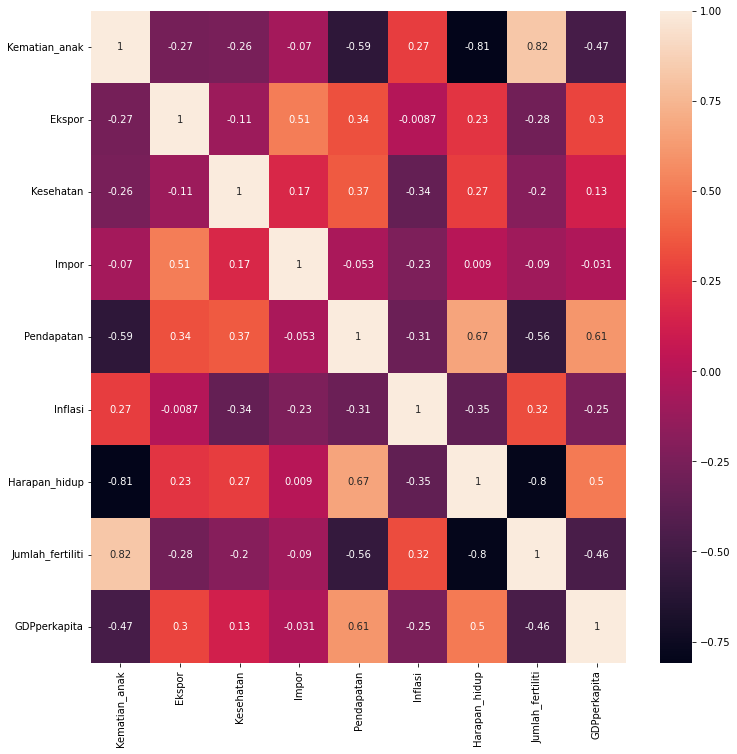

In [406]:
plt.figure(figsize=(12,12))
sns.heatmap(df_outlier.corr(), annot=True)

Dua variabel dikatakan berkolerasi apabila perubahan pada variabel yang satu akan diikuti perubahan pada variabel yang lain secara teratur dengan arah yang sama (korelasi positif) atau berlawanan (korelasi negatif). Nilai korelasi berada pada rentang -1 sampai 0. Hubungan semakin kuat dengan arah yang sama jika korelasi bernilai mendekati angka 1, dan hubungan semakin kuat dengan arah yang berbeda jika korelasi bernilai mendekati angka -1. Jika korelasi berada disekitar angka 0, maka hubungan dinilai tidak begitu kuat (Tidak berpengaruh).

Kita dapat memilih pasangan fitur sesuai bidangnya masing-masing yang memiliki pengaruh kuat satu sama lain. (Korelasi bernilai lebih dari 0.6 atau kurang dari -0.6)

bidang kesehatan :    
1. Kematian_anak dan Jumlah_fertiliti (korelasi : 0.82)
2. Jumlah_fertiliti dan Harapan_hidup (korelasi : -0,8)
3. Harapan_hidup dan Kematian_anak (korelasi : -0,81)

bidang ekonomi :     
1. GDPperkapita dan Pendapatan (korelasi : 0.61)

Sedangkan untuk fitur yang berbeda bidang :    
1. Harapan_hidup dan Pendapatan (korelasi : 0.67)

#Kematian_anak dan Jumlah_fertiliti

In [407]:
df_KJ = pd.DataFrame(data= df_outlier, columns=['Kematian_anak','Jumlah_fertiliti'])
df_KJ.head()

,Kematian_anak,Jumlah_fertiliti
0,90.2,5.82
1,16.6,1.65
2,27.3,2.89
3,119.0,6.16
4,10.3,2.13


In [408]:
#Scalling data
sc = StandardScaler()
df_KJ = sc.fit_transform(df_KJ)

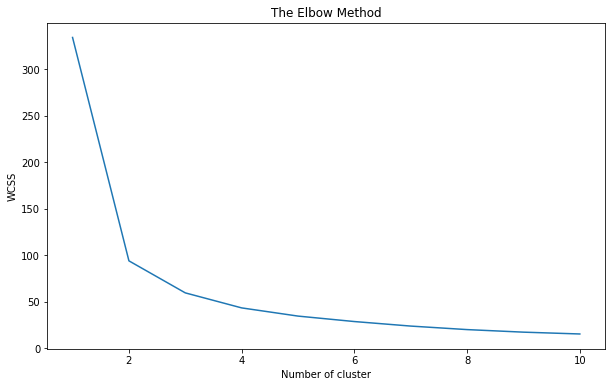

In [409]:
#Elbow Method Kematian_anak dan Jumlah_fertiliti
wcss = [] #Within-Cluster Sum of Square 
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_KJ)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

pada grafik diatas, kurva memiliki belokan yang tajam di titik 2, sehingga data ini akan dibuat dalam 2 cluster

In [410]:
#Silhoutte score untuk Kematian_anak dan Jumlah_fertiliti
from sklearn.metrics import silhouette_score

In [411]:
for i in range(2,11):
  labels = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(df_KJ).labels_
  print("Silhoutte Score for " + str(i) + " cluster is " + str(silhouette_score(df_KJ, labels)))

Silhoutte Score for 2 cluster is 0.660795120630944
Silhoutte Score for 3 cluster is 0.5297642505588523
Silhoutte Score for 4 cluster is 0.5118308590063755
Silhoutte Score for 5 cluster is 0.4943216502826326
Silhoutte Score for 6 cluster is 0.4972196419464737
Silhoutte Score for 7 cluster is 0.42387542957394886
Silhoutte Score for 8 cluster is 0.42446711581741464
Silhoutte Score for 9 cluster is 0.40181547942413554
Silhoutte Score for 10 cluster is 0.40654175324341707


Silhoutte score digunakan untuk melihat nilai k (banyaknya cluster) yang terbaik dilihat dari nilai yang tertinggi. Diperoleh Silhoutte score tertingginya yaiut 0.6607 untuk 2 cluster.

In [412]:
#KMeans Cluster Kematian_anak dan Jumlah_fertiliti
#2 cluster
kmeans_KJ = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(df_KJ)
labels_KJ = kmeans_KJ.labels_

df_KJ_cluster = pd.DataFrame(data= df_outlier, columns=['Kematian_anak','Jumlah_fertiliti'])
df_KJ_cluster['cluster'] = labels_KJ
df_KJ_cluster.head()

,Kematian_anak,Jumlah_fertiliti,cluster
0,90.2,5.82,0
1,16.6,1.65,1
2,27.3,2.89,1
3,119.0,6.16,0
4,10.3,2.13,1


In [413]:
df_KJ_scal = pd.DataFrame(data= df_KJ, columns=['Kematian_anak','Jumlah_fertiliti'])
df_KJ_scal['cluster'] = labels_KJ
df_KJ_scal.head()

,Kematian_anak,Jumlah_fertiliti,cluster
0,1.595554,1.977182,0
1,-0.528188,-0.862059,1
2,-0.219438,-0.017776,1
3,2.426584,2.208679,0
4,-0.709976,-0.535240,1


n_cluster = 2


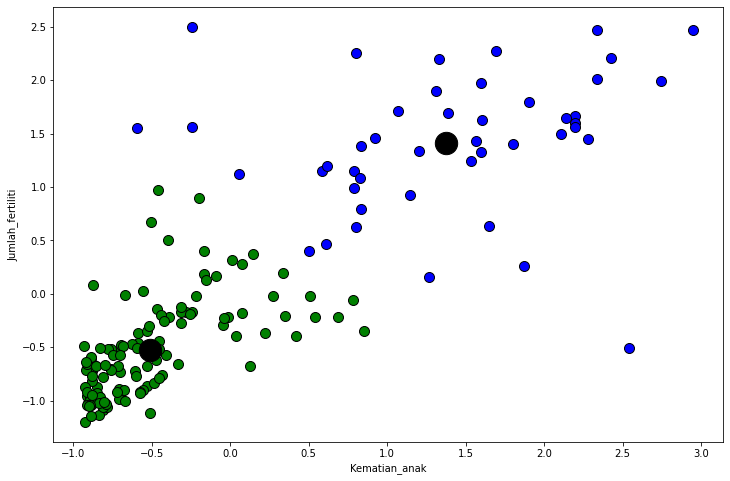

In [414]:
#Scatter Plot Kematian_anak dan Jumlah_fertiliti
plt.figure(figsize=(12,8))
print('n_cluster = 2')
plt.scatter(df_KJ_scal['Kematian_anak'][df_KJ_scal['cluster']==0], df_KJ_scal['Jumlah_fertiliti'][df_KJ_scal['cluster']==0], c='blue', s=100, edgecolors='black' )
plt.scatter(df_KJ_scal['Kematian_anak'][df_KJ_scal['cluster']==1], df_KJ_scal['Jumlah_fertiliti'][df_KJ_scal['cluster']==1], c='green', s=100, edgecolors='black' )

cluster = kmeans_KJ.cluster_centers_
plt.scatter(cluster[:,0], cluster[:,1], c='black', s=500)
plt.xlabel('Kematian_anak')
plt.ylabel('Jumlah_fertiliti')
plt.show()

Interpretasi :
Bisa dilihat bahwa terdapat 2 cluster. Cluster dengan label 1 berwarna hijau menunjukkan kecenderungan Kematian_anak dan jumlah_fertilitinya rendah, sedangkan cluster dengan label 0 berwarna biru menunjukkan kecenderungan Kematian_anak dan Jumlah_fertilitinya tinggi.

In [415]:
df_KJ_cluster.groupby(['cluster']).agg({'Kematian_anak':'mean', 'Jumlah_fertiliti':'mean'})

,Kematian_anak,Jumlah_fertiliti
cluster,,
0,82.573333,4.994889
1,17.322131,2.149344


Bisa disimpulkan:

cluster 0 : memiliki rata-rata tingkat kematian anak yang tinggi, yaitu 82 kematian anak per 1000 kelahiran dengan rata-rata 4 anak yang lahir dari setiap wanita

cluster 1 : memiliki rata-rata tingkat kematian anak yang rendah, yaitu 17 kematian anak per 1000 kelahiran dengan rata-rata 2 anak yang lahir dari setiap wanita

In [416]:
cluster_KJ = pd.concat([df['Negara'],df_KJ_cluster], axis=1, join='outer')
cluster_KJ.head()

,Negara,Kematian_anak,Jumlah_fertiliti,cluster
0,Afghanistan,90.2,5.82,0
1,Albania,16.6,1.65,1
2,Algeria,27.3,2.89,1
3,Angola,119.0,6.16,0
4,Antigua and Barbuda,10.3,2.13,1


In [417]:
print('daftar negara cluster 0 :')
print(cluster_KJ[cluster_KJ.cluster == 0].Negara.values)
print('Total : ', cluster_KJ[cluster_KJ.cluster == 0].Negara.count())

daftar negara cluster 0 :
['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Iraq' 'Kenya' 'Kiribati' 'Lao'
 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'Sudan' 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Uganda' 'Yemen' 'Zambia']
Total :  45


In [418]:
print('daftar negara cluster 1 :')
print(cluster_KJ[cluster_KJ.cluster == 1].Negara.values)
print('Total : ', cluster_KJ[cluster_KJ.cluster == 1].Negara.count())

daftar negara cluster 1 :
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Cambodia' 'Canada' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica'
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji' 'Finland' 'France'
 'Georgia' 'Germany' 'Greece' 'Grenada' 'Guatemala' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kuwait' 'Kyrgyz Republic'
 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Luxembourg' 'Macedonia, FYR'
 'Malaysia' 'Maldives' 'Malta' 'Mauritius' 'Micronesia, Fed. Sts.'
 'Moldova' 'Mongolia' 'Montenegro' 'Morocco' 'Myanmar' 'Nepal'
 'Netherlands' 'New Zealand' 'Norway' 'Oman' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Pol

Dari hasil analisis diatas, negara yang ada di cluster 0 akan dipertimbangkan untuk menjadi penerima bantuan dari organisasi HELP dikarenakan tingginya tingkat kematian_anak dan juga jumlah_fertiliti

#Jumlah_fertiliti dan Harapan_hidup

In [419]:
df_JH = pd.DataFrame(data= df_outlier, columns=['Jumlah_fertiliti','Harapan_hidup'])
df_JH.head()

,Jumlah_fertiliti,Harapan_hidup
0,5.82,56.2
1,1.65,76.3
2,2.89,76.5
3,6.16,60.1
4,2.13,76.8


In [420]:
#Scalling data
sc = StandardScaler()
df_JH = sc.fit_transform(df_JH)

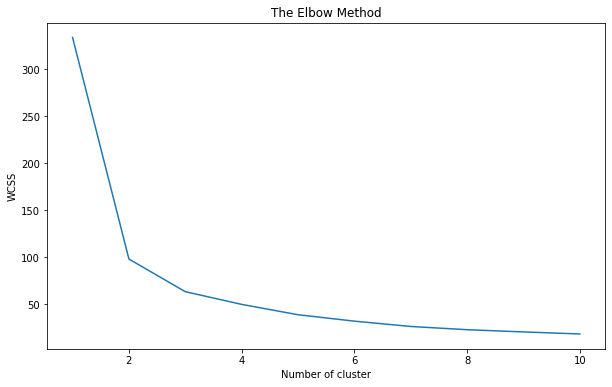

In [421]:
#Elbow Method Jumlah_fertiliti dan Harapan_hidup
wcss = [] #Within-Cluster Sum of Square 
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_JH)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

pada grafik diatas, kurva memiliki belokan yang tajam di titik 2, sehingga data ini akan dibuat dalam 2 cluster

In [422]:
#Silhoutte score untuk Jumlah_fertiliti dan Harapan_hidup

In [423]:
for i in range(2,11):
  labels = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(df_JH).labels_
  print("Silhoutte Score for " + str(i) + " cluster is " + str(silhouette_score(df_JH, labels)))

Silhoutte Score for 2 cluster is 0.6196471771566665
Silhoutte Score for 3 cluster is 0.48448592618290964
Silhoutte Score for 4 cluster is 0.374775764837035
Silhoutte Score for 5 cluster is 0.384113677320947
Silhoutte Score for 6 cluster is 0.39555718979712834
Silhoutte Score for 7 cluster is 0.4254390328989852
Silhoutte Score for 8 cluster is 0.40348736137429314
Silhoutte Score for 9 cluster is 0.37672513967871907
Silhoutte Score for 10 cluster is 0.38838627456620156


[link text](https://)Silhoutte score digunakan untuk melihat nilai k (banyaknya cluster) yang terbaik dilihat dari nilai yang tertinggi. Diperoleh Silhoutte score tertingginya yaiut 0.6196 untuk 2 cluster.

In [424]:
#KMeans Cluster Jumlah_fertiliti dan Harapan_hidup
#2 cluster
kmeans_JH = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(df_JH)
labels_JH = kmeans_JH.labels_

df_JH_cluster = pd.DataFrame(data= df_outlier, columns=['Jumlah_fertiliti', 'Harapan_hidup'])
df_JH_cluster['cluster'] = labels_JH
df_JH_cluster.head()

,Jumlah_fertiliti,Harapan_hidup,cluster
0,5.82,56.2,1
1,1.65,76.3,0
2,2.89,76.5,0
3,6.16,60.1,1
4,2.13,76.8,0


In [425]:
df_JH_scal = pd.DataFrame(data= df_JH, columns=['Jumlah_fertiliti','Harapan_hidup'])
df_JH_scal['cluster'] = labels_JH
df_JH_scal.head()

,Jumlah_fertiliti,Harapan_hidup,cluster
0,1.977182,-1.870459,1
1,-0.862059,0.651967,0
2,-0.017776,0.677065,0
3,2.208679,-1.381033,1
4,-0.535240,0.714713,0


n_cluster = 2


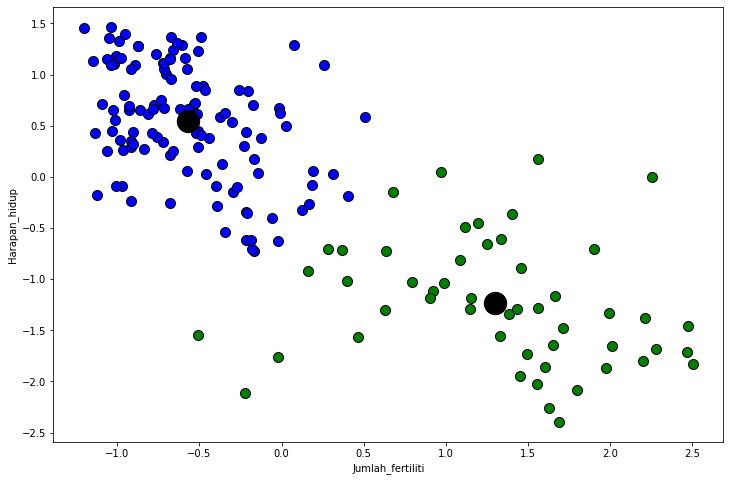

In [426]:
#Scatter Plot Jumlah_fertiliti dan Harapan_hidup
plt.figure(figsize=(12,8))
print('n_cluster = 2')
plt.scatter(df_JH_scal['Jumlah_fertiliti'][df_JH_scal['cluster']==0], df_JH_scal['Harapan_hidup'][df_JH_scal['cluster']==0], c='blue', s=100, edgecolors='black' )
plt.scatter(df_JH_scal['Jumlah_fertiliti'][df_JH_scal['cluster']==1], df_JH_scal['Harapan_hidup'][df_JH_scal['cluster']==1], c='green', s=100, edgecolors='black' )

cluster = kmeans_JH.cluster_centers_
plt.scatter(cluster[:,0], cluster[:,1], c='black', s=500)
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Harapan_hidup')
plt.show()

Interpretasi :
Bisa dilihat bahwa terdapat 2 cluster. Cluster dengan label 1 berwarna hijau menunjukkan kecenderungan Jumlah_fertilitinya tinggi namun Harapan_hidupnya rendah, sedangkan cluster dengan label 0 berwarna biru menunjukkan kecenderungan Jumlah_fertilitinya rendah namun Harapan_hidupnya tinggi

In [427]:
df_JH_cluster.groupby(['cluster']).agg({'Jumlah_fertiliti':'mean','Harapan_hidup':'mean', })

,Jumlah_fertiliti,Harapan_hidup
cluster,,
0,2.075690,75.425000
1,4.827647,61.278431


Bisa disimpulkan:

cluster 0 : memiliki rata-rata Harapan hidup yang tinggi, yaitu 75 tahun. Kemudian jumlah fertilitinya 2, artinya rata-rata 2 anak lahir dari setiap wanita.

cluster 1 : memiliki rata-rata Harapan hidup lebih rendah dari cluster 0, yaitu 61 tahun. Kemudian jumlah fertilitinya 4, artinya rata-rata 4 anak lahir dari setiap wanita.

In [428]:
cluster_JH = pd.concat([df['Negara'],df_JH_cluster], axis=1, join='outer')
cluster_JH.head()

,Negara,Jumlah_fertiliti,Harapan_hidup,cluster
0,Afghanistan,5.82,56.2,1
1,Albania,1.65,76.3,0
2,Algeria,2.89,76.5,0
3,Angola,6.16,60.1,1
4,Antigua and Barbuda,2.13,76.8,0


In [429]:
print('daftar negara cluster 0 :')
print(cluster_JH[cluster_JH.cluster == 0].Negara.values)
print('Total : ', cluster_JH[cluster_JH.cluster == 0].Negara.count())

daftar negara cluster 0 :
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria' 'Cambodia' 'Canada'
 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Fiji' 'Finland' 'France' 'Georgia' 'Germany'
 'Greece' 'Grenada' 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kuwait' 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Lesotho'
 'Libya' 'Lithuania' 'Luxembourg' 'Macedonia, FYR' 'Malaysia' 'Maldives'
 'Malta' 'Mauritius' 'Moldova' 'Mongolia' 'Montenegro' 'Morocco' 'Myanmar'
 'Nepal' 'Netherlands' 'New Zealand' 'Norway' 'Oman' 'Panama' 'Paraguay'
 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar' 'Romania' 

In [430]:
print('daftar negara cluster 1 :')
print(cluster_JH[cluster_JH.cluster == 1].Negara.values)
print('Total : ', cluster_JH[cluster_JH.cluster == 1].Negara.count())

daftar negara cluster 1 :
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Micronesia, Fed. Sts.' 'Mozambique' 'Namibia' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Samoa' 'Senegal' 'Sierra Leone' 'Solomon Islands'
 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste' 'Togo' 'Tonga' 'Uganda'
 'Vanuatu' 'Yemen' 'Zambia']
Total :  51


Dari hasil analisis diatas, negara yang ada di cluster 1 akan dipertimbangkan untuk menjadi penerima bantuan dari organisasi HELP dikarenakan tingginya jumlah_fertiliti namun harapan hidupnya rendah.

#Harapan_hidup dan Kematian_anak

In [431]:
df_HK = pd.DataFrame(data= df_outlier, columns=['Harapan_hidup', 'Kematian_anak'])
df_HK.head()

,Harapan_hidup,Kematian_anak
0,56.2,90.2
1,76.3,16.6
2,76.5,27.3
3,60.1,119.0
4,76.8,10.3


In [432]:
#Scalling data
sc = StandardScaler()
df_HK = sc.fit_transform(df_HK)

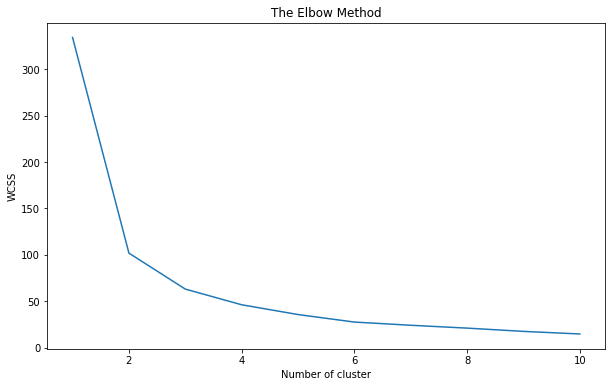

In [433]:
#Elbow Method Harapan_hidup dan Kematian_anak
wcss = [] #Within-Cluster Sum of Square 
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_HK)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

pada grafik diatas, kurva memiliki belokan yang tajam di titik 2, sehingga data ini akan dibuat dalam 2 cluster

In [434]:
#Silhoutte score untuk Harapan_hidup dan Kematian_anak

In [435]:
for i in range(2,11):
  labels = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(df_HK).labels_
  print("Silhoutte Score for " + str(i) + " cluster is " + str(silhouette_score(df_HK, labels)))

Silhoutte Score for 2 cluster is 0.6160293170026593
Silhoutte Score for 3 cluster is 0.544367404702034
Silhoutte Score for 4 cluster is 0.4288944129438525
Silhoutte Score for 5 cluster is 0.46327502627244527
Silhoutte Score for 6 cluster is 0.4640045937440234
Silhoutte Score for 7 cluster is 0.4583050257972643
Silhoutte Score for 8 cluster is 0.459513638862525
Silhoutte Score for 9 cluster is 0.45815197979171407
Silhoutte Score for 10 cluster is 0.4405429460153291


Silhoutte score digunakan untuk melihat nilai k (banyaknya cluster) yang terbaik dilihat dari nilai yang tertinggi. Diperoleh Silhoutte score tertingginya yaiut 0.6160 untuk 2 cluster.

In [436]:
#KMeans Cluster Harapan_hidup dan Kematian_anak
#2 cluster
kmeans_HK = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(df_HK)
labels_HK = kmeans_HK.labels_

df_HK_cluster = pd.DataFrame(data= df_outlier, columns=['Harapan_hidup', 'Kematian_anak'])
df_HK_cluster['cluster'] = labels_HK
df_HK_cluster.head()

,Harapan_hidup,Kematian_anak,cluster
0,56.2,90.2,1
1,76.3,16.6,0
2,76.5,27.3,0
3,60.1,119.0,1
4,76.8,10.3,0


In [437]:
df_HK_scal = pd.DataFrame(data= df_HK, columns=['Harapan_hidup','Kematian_anak'])
df_HK_scal['cluster'] = labels_HK
df_HK_scal.head()

,Harapan_hidup,Kematian_anak,cluster
0,-1.870459,1.595554,1
1,0.651967,-0.528188,0
2,0.677065,-0.219438,0
3,-1.381033,2.426584,1
4,0.714713,-0.709976,0


n_cluster = 2


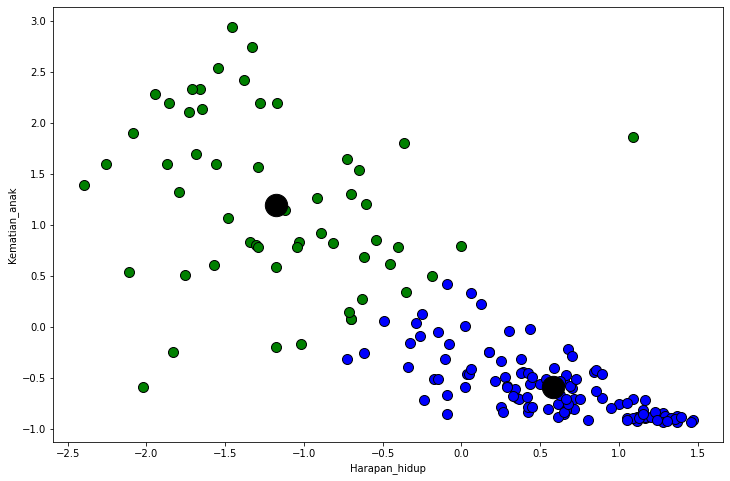

In [438]:
#Scatter Plot Harapan_hidup dan Kematian_anak
plt.figure(figsize=(12,8))
print('n_cluster = 2')
plt.scatter(df_HK_scal['Harapan_hidup'][df_HK_scal['cluster']==0], df_HK_scal['Kematian_anak'][df_HK_scal['cluster']==0], c='blue', s=100, edgecolors='black' )
plt.scatter(df_HK_scal['Harapan_hidup'][df_HK_scal['cluster']==1], df_HK_scal['Kematian_anak'][df_HK_scal['cluster']==1], c='green', s=100, edgecolors='black' )

cluster = kmeans_HK.cluster_centers_
plt.scatter(cluster[:,0], cluster[:,1], c='black', s=500)
plt.xlabel('Harapan_hidup')
plt.ylabel('Kematian_anak')
plt.show()

Interpretasi :
Bisa dilihat bahwa terdapat 2 cluster. Cluster dengan label 1 berwarna hijau menunjukkan kecenderungan Kematian_anak tinggi namun Harapan_hidupnya rendah, sedangkan cluster dengan label 0 berwarna biru menunjukkan kecenderungan Kematian_anak rendah namun Harapan_hidupnya tinggi

In [439]:
df_HK_cluster.groupby(['cluster']).agg({'Harapan_hidup':'mean','Kematian_anak':'mean' })

,Harapan_hidup,Kematian_anak
cluster,,
0,75.716071,14.476786
1,61.714545,76.503636


Bisa disimpulkan:

cluster 0 : memiliki rata-rata Harapan hidup yang tinggi, yaitu 75 tahun dengan rata-rata terdapat 14 Kematian anak per 10000 kelahiran

cluster 1 : memiliki rata-rata Harapan hidup lebih rendah dari cluster 0, yaitu 61 tahun dengan rata-rata terdapat 76 Kematian anak per 10000 kelahiran

In [440]:
cluster_HK = pd.concat([df['Negara'],df_HK_cluster], axis=1, join='outer')
cluster_HK.head()

,Negara,Harapan_hidup,Kematian_anak,cluster
0,Afghanistan,56.2,90.2,1
1,Albania,76.3,16.6,0
2,Algeria,76.5,27.3,0
3,Angola,60.1,119.0,1
4,Antigua and Barbuda,76.8,10.3,0


In [441]:
print('daftar negara cluster 0 :')
print(cluster_HK[cluster_HK.cluster == 0].Negara.values)
print('Total : ', cluster_HK[cluster_HK.cluster == 0].Negara.count())

daftar negara cluster 0 :
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji'
 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada' 'Guatemala'
 'Hungary' 'Iceland' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kuwait' 'Kyrgyz Republic'
 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Luxembourg' 'Macedonia, FYR'
 'Malaysia' 'Maldives' 'Malta' 'Mauritius' 'Moldova' 'Mongolia'
 'Montenegro' 'Morocco' 'Netherlands' 'New Zealand' 'Norway' 'Oman'
 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar'
 'Romania' 'Russia' 'Samoa' 'Sau

In [442]:
print('daftar negara cluster 1 :')
print(cluster_HK[cluster_HK.cluster == 1].Negara.values)
print('Total : ', cluster_HK[cluster_HK.cluster == 1].Negara.count())

daftar negara cluster 1 :
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Chad' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.'
 "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon' 'Gambia' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Kenya' 'Kiribati'
 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Micronesia, Fed. Sts.' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Niger'
 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'Solomon Islands'
 'South Africa' 'Sudan' 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Turkmenistan' 'Uganda' 'Vanuatu' 'Yemen' 'Zambia']
Total :  55


Dari hasil analisis diatas, negara yang ada di cluster 1 akan dipertimbangkan untuk menjadi penerima bantuan dari organisasi HELP dikarenakan tingginya Kematian_anak namun harapan hidupnya rendah.

#GDPperkapita dan Pendapatan

In [443]:
df_GP = pd.DataFrame(data= df_outlier, columns=['GDPperkapita', 'Pendapatan'])
df_GP.head()

,GDPperkapita,Pendapatan
0,553.0,1610.0
1,4090.0,9930.0
2,4460.0,12900.0
3,3530.0,5900.0
4,12200.0,19100.0


In [444]:
#Scalling data
sc = StandardScaler()
df_GP = sc.fit_transform(df_GP)

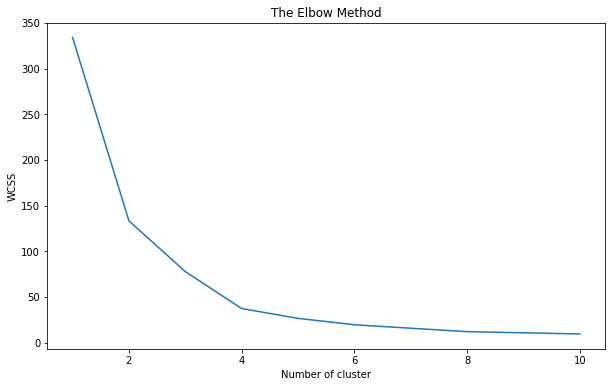

In [445]:
#Elbow Method GDPperkapita dan Pendapatan
wcss = [] #Within-Cluster Sum of Square 
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_GP)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

pada grafik diatas, kurva memiliki belokan yang tajam di titik 2 dan titik 4, sehingga kita akan sesuaikan dengan Sillhoutte score untuk menentukan banyaknya cluster yang akan dibuat.

In [446]:
#Silhoutte score untuk GDPperkapita dan Pendapatan

In [447]:
for i in range(2,11):
  labels = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(df_GP).labels_
  print("Silhoutte Score for " + str(i) + " cluster is " + str(silhouette_score(df_GP, labels)))

Silhoutte Score for 2 cluster is 0.6019552031066541
Silhoutte Score for 3 cluster is 0.5916669279153621
Silhoutte Score for 4 cluster is 0.6298540261191707
Silhoutte Score for 5 cluster is 0.5825420920449407
Silhoutte Score for 6 cluster is 0.5810962805674209
Silhoutte Score for 7 cluster is 0.5580194578683566
Silhoutte Score for 8 cluster is 0.5703638066566458
Silhoutte Score for 9 cluster is 0.5680345734848481
Silhoutte Score for 10 cluster is 0.5413482584979522


Silhoutte score digunakan untuk melihat nilai k (banyaknya cluster) yang terbaik dilihat dari nilai yang tertinggi. Diperoleh Silhoutte score tertingginya yaiut 0.6298 untuk 4 cluster.

In [448]:
#KMeans Cluster GDPperkapita dan Pendapatan
#4 cluster
kmeans_GP = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(df_GP)
labels_GP = kmeans_GP.labels_

df_GP_cluster = pd.DataFrame(data= df_outlier, columns=['GDPperkapita', 'Pendapatan'])
df_GP_cluster['cluster'] = labels_GP
df_GP_cluster.head()

,GDPperkapita,Pendapatan,cluster
0,553.0,1610.0,2
1,4090.0,9930.0,2
2,4460.0,12900.0,2
3,3530.0,5900.0,2
4,12200.0,19100.0,0


In [449]:
df_GP_scal = pd.DataFrame(data= df_GP, columns=['GDPperkapita','Pendapatan'])
df_GP_scal['cluster'] = labels_GP
df_GP_scal.head()

,GDPperkapita,Pendapatan,cluster
0,-0.822826,-0.953057,2
1,-0.327586,-0.321249,2
2,-0.275780,-0.095711,2
3,-0.405996,-0.627281,2
4,0.807949,0.375108,0


n_cluster = 4


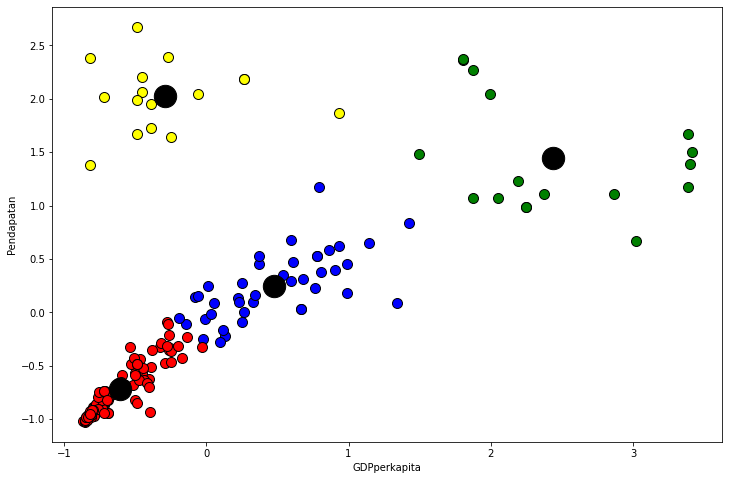

In [450]:
#Scatter Plot GDPperkapita dan Pendapatan
plt.figure(figsize=(12,8))
print('n_cluster = 4')
plt.scatter(df_GP_scal['GDPperkapita'][df_GP_scal['cluster']==0], df_GP_scal['Pendapatan'][df_GP_scal['cluster']==0], c='blue', s=100, edgecolors='black' )
plt.scatter(df_GP_scal['GDPperkapita'][df_GP_scal['cluster']==1], df_GP_scal['Pendapatan'][df_GP_scal['cluster']==1], c='green', s=100, edgecolors='black' )
plt.scatter(df_GP_scal['GDPperkapita'][df_GP_scal['cluster']==2], df_GP_scal['Pendapatan'][df_GP_scal['cluster']==2], c='red', s=100, edgecolors='black' )
plt.scatter(df_GP_scal['GDPperkapita'][df_GP_scal['cluster']==3], df_GP_scal['Pendapatan'][df_GP_scal['cluster']==3], c='yellow', s=100, edgecolors='black' )

cluster = kmeans_GP.cluster_centers_
plt.scatter(cluster[:,0], cluster[:,1], c='black', s=500)
plt.xlabel('GDPperkapita')
plt.ylabel('Pendapatan')
plt.show()

Interpretasi :
Bisa dilihat bahwa terdapat 4 cluster

cluster 0 (biru) :  Merupakan negara-negara yang memiliki pendapatan dan GDPperkapita menengah (tidak tinggi dan tidak juga rendah.

cluster 1 (hijau) :  Merupakan negara-negara yang memiliki pendapatan dan GDPperkapita tinggi.

cluster 2 (merah) :  Merupakan negara-negara yang memiliki pendapatan dan GDPperkapita rendah.

cluster 3 (kuning) :  Merupakan negara-negara yang memiliki pendapatan tinggi namun GDPperkapitanya rendah. Bisa dilihat bahwa pendapatan cluster ini bahkan rata-ratanya melebihi pendapatan cluster 1.

In [451]:
df_GP_cluster.groupby(['cluster']).agg({'GDPperkapita':'mean','Pendapatan':'mean' })

,GDPperkapita,Pendapatan
cluster,,
0,9817.560976,17341.463415
1,23835.294118,33141.176471
2,2107.344086,4703.043011
3,4377.750000,40812.500000


Bisa disimpulkan:

cluster 0 : memiliki rata-rata GDPperkapita dan pendapatan yang tidak terlalu tinggi dan juga tidak terlalu rendah dibanding dengan negara lain.

cluster 1 : memiliki rata-rata GDPperkapita sangat tinggi yaitu 23835.29 dan juga rata-rata pendapatan tinggi yaitu $33141.17 per orang.

cluster 2 : memiliki rata-rata GDPperkapita sangat rendah, yaitu hanya 2170.34 dan juga rata-rata pendapatan yang sangat rendah yaitu hanya $4703.04 per orang.

cluster 3 : memiliki rata-rata GDPperkapita yang bisa dibilang rendah, tidak jauh dari cluster 2, yaitu hanya 4377.75 namun rata-rata pendapatan per orangnya sangatlah tinggi, bahkan lebih tinggi dari cluster 1, yaitu $40812.5.

In [452]:
cluster_GP = pd.concat([df['Negara'],df_GP_cluster], axis=1, join='outer')
cluster_GP.head()

,Negara,GDPperkapita,Pendapatan,cluster
0,Afghanistan,553.0,1610.0,2
1,Albania,4090.0,9930.0,2
2,Algeria,4460.0,12900.0,2
3,Angola,3530.0,5900.0,2
4,Antigua and Barbuda,12200.0,19100.0,0


In [453]:
print('daftar negara cluster 0 :')
print(cluster_GP[cluster_GP.cluster == 0].Negara.values)
print('Total : ', cluster_GP[cluster_GP.cluster == 0].Negara.count())

daftar negara cluster 0 :
['Antigua and Barbuda' 'Argentina' 'Azerbaijan' 'Barbados' 'Belarus'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Chile' 'Colombia' 'Costa Rica'
 'Croatia' 'Estonia' 'Gabon' 'Grenada' 'Hungary' 'Iran' 'Kazakhstan'
 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives'
 'Mauritius' 'Montenegro' 'Panama' 'Poland' 'Romania' 'Russia' 'Serbia'
 'Seychelles' 'Slovak Republic' 'South Africa' 'Suriname' 'Thailand'
 'Turkey' 'Uruguay' 'Venezuela']
Total :  41


In [454]:
print('daftar negara cluster 1 :')
print(cluster_GP[cluster_GP.cluster == 1].Negara.values)
print('Total : ', cluster_GP[cluster_GP.cluster == 1].Negara.count())

daftar negara cluster 1 :
['Bahamas' 'Bahrain' 'Cyprus' 'Czech Republic' 'Denmark'
 'Equatorial Guinea' 'Greece' 'Israel' 'Italy' 'Malta' 'Oman' 'Portugal'
 'Qatar' 'Saudi Arabia' 'Slovenia' 'South Korea' 'Spain']
Total :  17


In [455]:
print('daftar negara cluster 2 :')
print(cluster_GP[cluster_GP.cluster == 2].Negara.values)
print('Total : ', cluster_GP[cluster_GP.cluster == 2].Negara.count())

daftar negara cluster 2 :
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Armenia' 'Bangladesh'
 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Cape Verde'
 'Central African Republic' 'Chad' 'China' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Eritrea' 'Fiji' 'Gambia' 'Georgia' 'Ghana' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Indonesia' 'Iraq'
 'Jamaica' 'Jordan' 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyz Republic' 'Lao'
 'Lesotho' 'Liberia' 'Macedonia, FYR' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Morocco'
 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Niger' 'Nigeria' 'Norway'
 'Pakistan' 'Paraguay' 'Peru' 'Philippines' 'Rwanda' 'Samoa' 'Senegal'
 'Sierra Leone' 'Singapore' 'Solomon Islands' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Sudan' 'Tajikistan' 'Tanzania'
 'Timor-Leste' 'Togo' 'Tonga'

In [456]:
print('daftar negara cluster 3 :')
print(cluster_GP[cluster_GP.cluster == 3].Negara.values)
print('Total : ', cluster_GP[cluster_GP.cluster == 3].Negara.count())

daftar negara cluster 3 :
['Australia' 'Austria' 'Belgium' 'Canada' 'Finland' 'France' 'Germany'
 'Iceland' 'Ireland' 'Japan' 'Netherlands' 'New Zealand' 'Sweden'
 'Switzerland' 'United Kingdom' 'United States']
Total :  16


Dari hasil analisis diatas, negara yang ada di cluster 2 akan dipertimbangkan untuk menjadi penerima bantuan dari organisasi HELP dikarenakan GDPperkapita dan pendapatan sangatlah rendah dibandingkan dengan cluster-cluster yang lain.

#Harapan_hidup dan Pendapatan

In [457]:
df_HP = pd.DataFrame(data= df_outlier, columns=['Harapan_hidup', 'Pendapatan'])
df_HP.head()

,Harapan_hidup,Pendapatan
0,56.2,1610.0
1,76.3,9930.0
2,76.5,12900.0
3,60.1,5900.0
4,76.8,19100.0


In [458]:
#Scalling data
sc = StandardScaler()
df_HP = sc.fit_transform(df_HP)

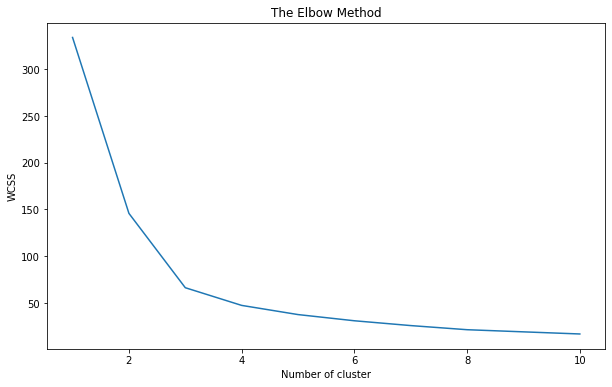

In [459]:
#Elbow Method Harapan_hidup dan Pendapatan
wcss = [] #Within-Cluster Sum of Square 
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_HP)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

pada grafik diatas, kurva memiliki belokan yang tajam di titik 2 dan titik 3, sehingga kita akan sesuaikan dengan Sillhoutte score untuk menentukan banyaknya cluster yang akan dibuat.

In [460]:
#Silhoutte score untuk Harapan_hidup dan Pendapatan

In [461]:
for i in range(2,11):
  labels = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(df_HP).labels_
  print("Silhoutte Score for " + str(i) + " cluster is " + str(silhouette_score(df_HP, labels)))

Silhoutte Score for 2 cluster is 0.4704669117488838
Silhoutte Score for 3 cluster is 0.5288031308224227
Silhoutte Score for 4 cluster is 0.47237617455320874
Silhoutte Score for 5 cluster is 0.4341091031931143
Silhoutte Score for 6 cluster is 0.4369168570969239
Silhoutte Score for 7 cluster is 0.4353557153314628
Silhoutte Score for 8 cluster is 0.4228923638059843
Silhoutte Score for 9 cluster is 0.430543402636842
Silhoutte Score for 10 cluster is 0.41756912399378043


Silhoutte score digunakan untuk melihat nilai k (banyaknya cluster) yang terbaik dilihat dari nilai yang tertinggi. Diperoleh Silhoutte score tertingginya yaiut 0.52880 untuk 3 cluster.

In [462]:
#KMeans Cluster Harapan_hidup dan Pendapatan
#3 cluster
kmeans_HP = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_HP)
labels_HP = kmeans_HP.labels_

df_HP_cluster = pd.DataFrame(data= df_outlier, columns=['Harapan_hidup', 'Pendapatan'])
df_HP_cluster['cluster'] = labels_HP
df_HP_cluster.head()

,Harapan_hidup,Pendapatan,cluster
0,56.2,1610.0,0
1,76.3,9930.0,1
2,76.5,12900.0,1
3,60.1,5900.0,0
4,76.8,19100.0,1


In [463]:
df_HP_scal = pd.DataFrame(data= df_HP, columns=['Harapan_hidup','Pendapatan'])
df_HP_scal['cluster'] = labels_HP
df_HP_scal.head()

,Harapan_hidup,Pendapatan,cluster
0,-1.870459,-0.953057,0
1,0.651967,-0.321249,1
2,0.677065,-0.095711,1
3,-1.381033,-0.627281,0
4,0.714713,0.375108,1


n_cluster = 3


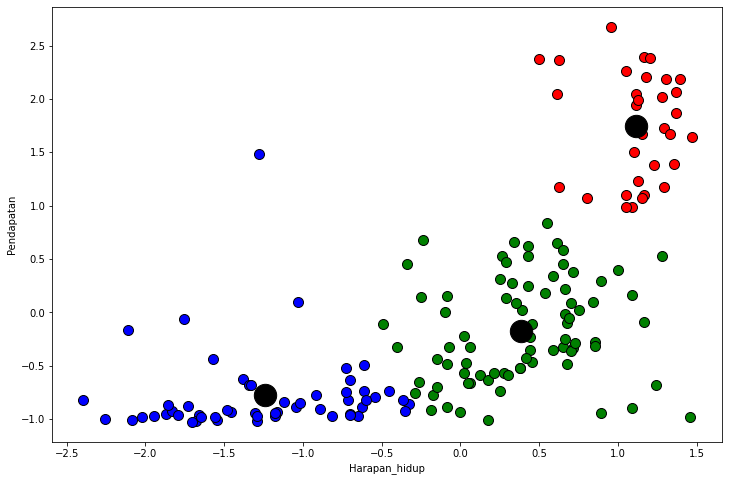

In [464]:
#Scatter Plot Harapan_hidup dan pendapatan
plt.figure(figsize=(12,8))
print('n_cluster = 3')
plt.scatter(df_HP_scal['Harapan_hidup'][df_HP_scal['cluster']==0], df_HP_scal['Pendapatan'][df_HP_scal['cluster']==0], c='blue', s=100, edgecolors='black' )
plt.scatter(df_HP_scal['Harapan_hidup'][df_HP_scal['cluster']==1], df_HP_scal['Pendapatan'][df_HP_scal['cluster']==1], c='green', s=100, edgecolors='black' )
plt.scatter(df_HP_scal['Harapan_hidup'][df_HP_scal['cluster']==2], df_HP_scal['Pendapatan'][df_HP_scal['cluster']==2], c='red', s=100, edgecolors='black' )


cluster = kmeans_HP.cluster_centers_
plt.scatter(cluster[:,0], cluster[:,1], c='black', s=500)
plt.xlabel('Harapan_hidup')
plt.ylabel('Pendapatan')
plt.show()

Interpretasi :
Bisa dilihat bahwa terdapat 3 cluster

cluster 0 (biru) :  Merupakan negara-negara yang memiliki pendapatan dan harapan hidup rendah

cluster 1 (hijau) :  Merupakan negara-negara yang memiliki pendapatan rendah namun harapan hidup cukup tinggi.

cluster 2 (merah) :  Merupakan negara-negara yang memiliki pendapatan dan harapan hidup yang sangat tinggi.


In [465]:
df_HP_cluster.groupby(['cluster']).agg({'Harapan_hidup':'mean','Pendapatan':'mean' })

,Harapan_hidup,Pendapatan
cluster,,
0,61.220370,3923.611111
1,74.185185,11895.160494
2,79.987500,37168.750000


Bisa disimpulkan:

cluster 0 : memiliki rata-rata harapan hidup dan pendapatan sangat rendah, dengan rata-rata harapan hidup hanya 61 tahun dan pendapatan hanya $3923.61 per orang.

cluster 1 : memiliki rata-rata harapan hidup cukup tinggi namun dengan rata-rata pendapatan rendah. Rata-rata harapan hidupnya 74 tahun dengan pendapatan setiap orang $11895.16.

cluster 2 : memiliki rata-rata hidup dan pendapatan sangat tinggi, dengan rata-rata harapan hidup mencapai 79 tahun dan rata-rata pendapatan mencapai $37168.75 per orang.

In [466]:
cluster_HP = pd.concat([df['Negara'],df_HP_cluster], axis=1, join='outer')
cluster_HP.head()

,Negara,Harapan_hidup,Pendapatan,cluster
0,Afghanistan,56.2,1610.0,0
1,Albania,76.3,9930.0,1
2,Algeria,76.5,12900.0,1
3,Angola,60.1,5900.0,0
4,Antigua and Barbuda,76.8,19100.0,1


In [467]:
print('daftar negara cluster 0 :')
print(cluster_HP[cluster_HP.cluster == 0].Negara.values)
print('Total : ', cluster_HP[cluster_HP.cluster == 0].Negara.count())

daftar negara cluster 0 :
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Chad' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.'
 "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Fiji' 'Gabon' 'Gambia'
 'Ghana' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Kenya'
 'Kiribati' 'Kyrgyz Republic' 'Lao' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Micronesia, Fed. Sts.' 'Mongolia' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan' 'Tanzania' 'Togo'
 'Uganda' 'Vanuatu' 'Yemen' 'Zambia']
Total :  54


In [468]:
print('daftar negara cluster 1 :')
print(cluster_HP[cluster_HP.cluster == 1].Negara.values)
print('Total : ', cluster_HP[cluster_HP.cluster == 1].Negara.count())

daftar negara cluster 1 :
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belize'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria'
 'Cape Verde' 'Central African Republic' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Georgia' 'Grenada' 'Guatemala' 'Hungary'
 'Indonesia' 'Iran' 'Iraq' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kuwait'
 'Latvia' 'Lebanon' 'Lesotho' 'Lithuania' 'Luxembourg' 'Macedonia, FYR'
 'Malaysia' 'Maldives' 'Mauritius' 'Moldova' 'Montenegro' 'Morocco'
 'Norway' 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Romania'
 'Russia' 'Samoa' 'Serbia' 'Seychelles' 'Singapore' 'Slovak Republic'
 'Sri Lanka' 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan'
 'Thailand' 'Timor-Leste' 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan'
 'Ukraine' 'United Arab Emirates' 'Uruguay' 'Uzbekistan' 'Venezuela'
 'Vietnam']
Tot

In [469]:
print('daftar negara cluster 2 :')
print(cluster_HP[cluster_HP.cluster == 2].Negara.values)
print('Total : ', cluster_HP[cluster_HP.cluster == 2].Negara.count())

daftar negara cluster 2 :
['Australia' 'Austria' 'Bahrain' 'Belgium' 'Canada' 'Cyprus'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Libya' 'Malta'
 'Netherlands' 'New Zealand' 'Oman' 'Portugal' 'Qatar' 'Saudi Arabia'
 'Slovenia' 'South Korea' 'Spain' 'Sweden' 'Switzerland' 'United Kingdom'
 'United States']
Total :  32


Dari hasil analisis diatas, negara yang ada di cluster 0 akan dipertimbangkan untuk menjadi penerima bantuan dari organisasi HELP dikarenakan Harapan_hidup dan pendapatan cukup rendah.

#Analisis

Dilihat dari hasil clustering berdasarkan beberapa fitur yang memiliki korelasi yang tinggi, kita mendapatkan 1 cluster pada masing2 clustering untuk dipertimbangkan menjadi penerima bantuan dari organisasi HELP. Dari 5 clustering pasangan fitur, kita akan melihat negara mana yang ada pada setiap cluster yang dipertimbangka, sehingga kita dapat memilih negara tersebut sebagai negara yang paling tepat mendapatkan bantuan.

1. Kematian_anak dan Jumlah_fertiliti

pada clustering ini diperoleh cluster 0 menjadi pertimbangan untuk mendapatkan bantuan. Yaitu cluster dengan negara-negara yang memiliki tingkat Kematian_anak dan Jumlah_fertiliti tinggi.

In [470]:
#Negara yang memiliki tingkat Kematian anak dan Jumlah fertiliti tinggi
NKJ = cluster_KJ[cluster_KJ.cluster == 0].Negara.values

In [471]:
print("Negara yang memiliki tingkat Kematian anak dan Jumlah fertiliti tinggi : " 
      + str(NKJ))
print("Banyaknya negara :" + str(len(NKJ)))

Negara yang memiliki tingkat Kematian anak dan Jumlah fertiliti tinggi : ['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Iraq' 'Kenya' 'Kiribati' 'Lao'
 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'Sudan' 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Uganda' 'Yemen' 'Zambia']
Banyaknya negara :45


2. Jumlah_fertiliti dan Harapan_hidup

pada clustering ini diperoleh cluster 1 menjadi pertimbangan untuk mendapatkan bantuan. Yaitu cluster dengan negara-negara yang memiliki Jumlah_fertiliti tinggi namun Harapan_hidup rendah.

In [472]:
#Negara yang memiliki Jumlah fertiliti tinggi dan Harapan_hidup rendah
NJH = cluster_JH[cluster_JH.cluster == 1].Negara.values

In [473]:
print("Negara yang memiliki Jumlah fertiliti tinggi dan Harapan_hidup rendah : " 
      + str(NJH))
print("Banyaknya negara :" + str(len(NJH)))

Negara yang memiliki Jumlah fertiliti tinggi dan Harapan_hidup rendah : ['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Micronesia, Fed. Sts.' 'Mozambique' 'Namibia' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Samoa' 'Senegal' 'Sierra Leone' 'Solomon Islands'
 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste' 'Togo' 'Tonga' 'Uganda'
 'Vanuatu' 'Yemen' 'Zambia']
Banyaknya negara :51


3. Harapan_hidup dan Kematian_anak

pada clustering ini diperoleh cluster 2 menjadi pertimbangan untuk mendapatkan bantuan. Yaitu cluster dengan negara-negara yang memiliki tingkat Kematian_anak tinggi namun Harapan_hidup rendah

In [474]:
#Negara yang memiliki tingkat Kematian_anak tinggi dan Harapan_hidup rendah
NHK = cluster_HK[cluster_HK.cluster == 1].Negara.values

In [475]:
print("Negara yang memiliki tingkat Kematian_anak tinggi dan Harapan_hidup rendah : " 
      + str(NHK))
print("Banyaknya negara :" + str(len(NHK)))

Negara yang memiliki tingkat Kematian_anak tinggi dan Harapan_hidup rendah : ['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Chad' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.'
 "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon' 'Gambia' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Kenya' 'Kiribati'
 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Micronesia, Fed. Sts.' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Niger'
 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'Solomon Islands'
 'South Africa' 'Sudan' 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Turkmenistan' 'Uganda' 'Vanuatu' 'Yemen' 'Zambia']
Banyaknya negara :55


4. GDPperkapita dan Pendapatan

pada clustering ini diperoleh cluster 2 menjadi pertimbangan untuk mendapatkan bantuan. Yaitu cluster dengan negara-negara yang memiliki GDPperkapitan dan Pendapatan sangat rendah.

In [476]:
#Negara yang memiliki GDPperkapita dan Pendapatan rendah
NGP = cluster_GP[cluster_GP.cluster == 2].Negara.values

In [477]:
print("Negara yang memiliki GDPperkapita dan Pendapatan rendah : " 
      + str(NGP))
print("Banyaknya negara :" + str(len(NGP)))

Negara yang memiliki GDPperkapita dan Pendapatan rendah : ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Armenia' 'Bangladesh'
 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Cape Verde'
 'Central African Republic' 'Chad' 'China' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Eritrea' 'Fiji' 'Gambia' 'Georgia' 'Ghana' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Indonesia' 'Iraq'
 'Jamaica' 'Jordan' 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyz Republic' 'Lao'
 'Lesotho' 'Liberia' 'Macedonia, FYR' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Morocco'
 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Niger' 'Nigeria' 'Norway'
 'Pakistan' 'Paraguay' 'Peru' 'Philippines' 'Rwanda' 'Samoa' 'Senegal'
 'Sierra Leone' 'Singapore' 'Solomon Islands' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Sudan' 'Tajikistan' 'Tanzani

5. Harapan_hidup dan Pendapatan

pada clustering ini diperoleh cluster 0 menjadi pertimbangan untuk mendapatkan bantuan. Yaitu cluster dengan negara-negara yang memiliki NHarapan_hidup dan Pendapatan rendah.

In [478]:
#Negara yang memiliki Harapan_hidup dan Pendapatan rendah
NHP = cluster_HP[cluster_HP.cluster == 0].Negara.values

In [479]:
print("Negara yang memiliki Harapan_hidup dan Pendapatan rendah : " 
      + str(NHP))
print("Banyaknya negara :" + str(len(NHP)))

Negara yang memiliki Harapan_hidup dan Pendapatan rendah : ['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Chad' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.'
 "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Fiji' 'Gabon' 'Gambia'
 'Ghana' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Kenya'
 'Kiribati' 'Kyrgyz Republic' 'Lao' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Micronesia, Fed. Sts.' 'Mongolia' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan' 'Tanzania' 'Togo'
 'Uganda' 'Vanuatu' 'Yemen' 'Zambia']
Banyaknya negara :54


#Negara yang menerima bantuan

akan dicari negara yang masuk kedalam semua cluster yang menjadi pertimbangan, negara tersebut yang akan dipilih sebagai negara yang akan menerima bantuan dari organisasi HELP

In [480]:
NB = list(set(NKJ.tolist()) & set(NJH.tolist()) & set(NHK.tolist()) & set(NGP.tolist()) & set(NHP.tolist()))

In [481]:
print("Negara yang dipilih untuk mendapatkan bantuan adalah : " + str(np.array(NB)))
print("Banyaknya Negara : " + str(len(NB))+ " Negara")

Negara yang dipilih untuk mendapatkan bantuan adalah : ['Zambia' 'Lao' 'Cameroon' 'Mozambique' 'Kiribati' 'Chad' 'Malawi' 'Togo'
 'Mauritania' 'Tanzania' 'Kenya' 'Sudan' 'Pakistan' 'Burundi'
 'Congo, Rep.' 'Rwanda' "Cote d'Ivoire" 'Guinea' 'Burkina Faso' 'Niger'
 'Yemen' 'Madagascar' 'Guinea-Bissau' 'Gambia' 'Comoros' 'Sierra Leone'
 'Liberia' 'Senegal' 'Benin' 'Nigeria' 'Congo, Dem. Rep.' 'Angola'
 'Uganda' 'Namibia' 'Mali' 'Eritrea' 'Afghanistan' 'Ghana']
Banyaknya Negara : 38 Negara


#Kesimpulan

Kesimpulannya, berdasarkan faktor sosial ekonomi dan kesehatan yang ada pada dataset, diperoleh dari hasil clustering bahwa ada 38 Negara yang memiliki kriteria sesuai dengan bantuan yang akan diberikan oleh organisasi HELP. 38 Negara tersebut disarankan untuk Negara-negara yang menjadi fokus CEO organisasi HELP sebagai Negara yang dianggap paling membutuhkan bantuan.